<b>RFE (recursive feature elimination)</b> <br>
select features by recursively considering smaller and smaller sets of features based ranking in feature weight/importance analysis

1. Train estimator with initial set of features and the importance of each feature.
2. The least important feature(s) is removed from consideration
3. Repeat (1) and (2) until desired # features is obtained.

# Import Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

from sklearn.datasets import load_breast_cancer

# Load Data & Pre-Process

In [2]:
data_obj = load_breast_cancer()

In [5]:
# Add 50 fake fetures with random values

rvg  = np.random.RandomState(42)                        # random value generator
rv   = rvg.normal( size=(len(data_obj.data),50) )       # 50 new fake features with same amound of rows as raw data
X = np.hstack([data_obj.data, rv])
y = data_obj.target

In [4]:
print(f'Ori input size : {data_obj.data.shape}')
print(f'New input size : {X.shape}')

Ori input size : (569, 30)
New input size : (569, 80)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Train Model

In [9]:
model = RFE(RandomForestClassifier(n_estimators=100, random_state=0), n_features_to_select=30)
model.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=0, verbose=0,
                                     warm_start=False),
    n_features_to_select=30, step=1, verbose=0)

In [11]:
print(f'Before feature selection : {X_train.shape}')
print(f'After  feature selection : {model.transform(X_train).shape}')

Before feature selection : (284, 80)
After  feature selection : (284, 30)


# Evaluation : Feature Importance

In [20]:
mask = model.get_support()      # mask of the features selected
print(mask)

[ True  True  True  True  True  True  True  True  True False  True False
  True  True False  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True False  True False False False False
 False False False False  True False False False False False False False
 False False False False False False  True False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False]


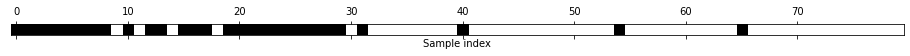

In [12]:
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('Sample index')
plt.yticks([])
plt.show()

# Seem like RFE only missed 5 features out of 30 actual features. 83% accuracy. 